                    Training a linear model on a Perceptron

In [37]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data

In [5]:
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25
)

In [8]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()

In [9]:
per_clf.fit(X_train, y_train)

Perceptron()

In [10]:
y_pred = per_clf.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5647193585337915

        Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras

In [40]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
model.layers[1].name

'dense'

In [24]:
model.get_layer('dense_2').name

'dense_2'

In [34]:
# compile a model

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [35]:
# Training and Evaluating the Model

history = model.fit(
    X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)
)

Epoch 1/10
1719/1719 [==============================] - 41s 9ms/step - loss: 0.7162 - accuracy: 0.7654 - val_loss: 0.5057 - val_accuracy: 0.8350
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4880 - accuracy: 0.8311 - val_loss: 0.4693 - val_accuracy: 0.8328
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4444 - accuracy: 0.8451 - val_loss: 0.4225 - val_accuracy: 0.8572
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4172 - accuracy: 0.8544 - val_loss: 0.3969 - val_accuracy: 0.8626
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3966 - accuracy: 0.8609 - val_loss: 0.3870 - val_accuracy: 0.8694
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3793 - accuracy: 0.8680 - val_loss: 0.3937 - val_accuracy: 0.8598
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3669 - accuracy: 0.8700 - val_loss: 0.3656 - val_ac

        we have trained a neural network

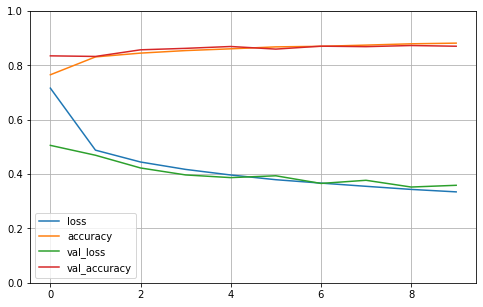

In [38]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

In [41]:
# evaluate the model

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 76.1473 - accuracy: 0.8127


[76.14730834960938, 0.8126999735832214]

In [42]:
# Using the Model to Make Predictions

X_new = X_test[:3]

y_proba = model.predict(X_new)

y_proba.round(2)

1/1 [==============================] - 1s 715ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)